# Ajay Kumar K P , email id: ajoctober06@gmail.com

#### 1) Extract reviews of any product from ecommerce website like amazon

#### 2) Perform emotion mining

## A. Web Scrapping using BeautifulSoup

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")

In [2]:
url="https://www.amazon.in/All-new-Echo-Dot/product-reviews/B084DWH53T/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
code = requests.get(url)
code

<Response [200]>

In [3]:
soup = BeautifulSoup(code.content,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:end-feature:head-start -->
  <!-- sp:feature:csm:head-open-part1 -->
  <!-- sp:end-feature:csm:head-open-part1 -->
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:end-feature:cs-optimization -->
  <!-- sp:feature:csm:head-open-part2 -->
  <!-- sp:end-feature:csm:head-open-part2 -->
  <!-- sp:feature:aui-assets -->
  <link href="https://m.media-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41tGz3DNCrL.css,31ufSReDtSL.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiD

In [4]:
star_rating = soup.select('i.review-rating span.a-icon-alt')[2:]
star_rating

[<span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">3.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">4.0 out of 5 stars</span>,
 <span class="a-icon-alt">5.0 out of 5 stars</span>]

In [5]:
len(star_rating)

10

In [6]:
reviews = soup.select('span.review-text-content span')
reviews

[<span>Great product, great tech, great sound quality, but somewhat impractical in daily life usages. I ended up using it to listen to songs only for the first few days, that too it could not voice search Bengali songs from Amazon Music itself, voice recognition of other Indian languages nowhere near google. Gradually found playing songs on Youtube on TV much more convenient with bigger music library. Controlling smart home appliances from mobile, as the speaker is not accessible from all rooms.<br/>Also many features and easter-eggs advertised by Amazon is not available in India (when using Indian-English language), we need to change the language to American English or British English to access those easter-eggs and features. But in that case Alexa is unable to understand many Indian words and the Indian accent.</span>,
 <span>This smart speaker is one of the cheapest ones in the industry , the cheapest up-to-date smart speaker if you exclude the 3rd gen echo-dot. That being said this

In [7]:
len(reviews)

11

In [8]:
ratings = []
rev_content = []
for i in range(len(star_rating)):
    ratings.append(star_rating[i].get_text())
    rev_content.append(reviews[i].get_text().strip("\n "))   

In [9]:
rev_content

['Great product, great tech, great sound quality, but somewhat impractical in daily life usages. I ended up using it to listen to songs only for the first few days, that too it could not voice search Bengali songs from Amazon Music itself, voice recognition of other Indian languages nowhere near google. Gradually found playing songs on Youtube on TV much more convenient with bigger music library. Controlling smart home appliances from mobile, as the speaker is not accessible from all rooms.Also many features and easter-eggs advertised by Amazon is not available in India (when using Indian-English language), we need to change the language to American English or British English to access those easter-eggs and features. But in that case Alexa is unable to understand many Indian words and the Indian accent.',
 'This smart speaker is one of the cheapest ones in the industry , the cheapest up-to-date smart speaker if you exclude the 3rd gen echo-dot. That being said this has tons of function

In [10]:
review_df = pd.DataFrame()
review_df['Ratings'] = ratings
review_df['Reviews'] = rev_content
review_df.describe

<bound method NDFrame.describe of               Ratings                                            Reviews
0  4.0 out of 5 stars  Great product, great tech, great sound quality...
1  3.0 out of 5 stars  This smart speaker is one of the cheapest ones...
2  4.0 out of 5 stars                            Wireless would be ideal
3  4.0 out of 5 stars  Not all information available like goggle assi...
4  4.0 out of 5 stars  एलेक्सा को यूज करने के लिए अलग से वाईफाई चाहिए...
5  4.0 out of 5 stars                                                   
6  4.0 out of 5 stars  It's good but need battery so that it more enj...
7  4.0 out of 5 stars  I am writing this review after using for one y...
8  4.0 out of 5 stars       there is some connectivity issue with laptop
9  5.0 out of 5 stars  All is good sound quality is poor comparision ...>

## B. Text Mining

In [11]:
!pip install spacy

^C


In [12]:
!pip install wordcloud

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

### preprocessing

In [16]:
review_df=[Reviews.strip() for Reviews in review_df.Reviews] 
review_df=[Reviews for Reviews in review_df if Reviews] 
review_df

['Great product, great tech, great sound quality, but somewhat impractical in daily life usages. I ended up using it to listen to songs only for the first few days, that too it could not voice search Bengali songs from Amazon Music itself, voice recognition of other Indian languages nowhere near google. Gradually found playing songs on Youtube on TV much more convenient with bigger music library. Controlling smart home appliances from mobile, as the speaker is not accessible from all rooms.Also many features and easter-eggs advertised by Amazon is not available in India (when using Indian-English language), we need to change the language to American English or British English to access those easter-eggs and features. But in that case Alexa is unable to understand many Indian words and the Indian accent.',
 'there is some connectivity issue with laptop',
 "It's good but need battery so that it more enjoyable",
 'एलेक्सा को यूज करने के लिए अलग से वाईफाई चाहिए यह बिना वाईफाई के कनेक्ट नही

In [17]:
# Joining the list into one string/text
reviews_text=' '.join(review_df)
reviews_text

'Great product, great tech, great sound quality, but somewhat impractical in daily life usages. I ended up using it to listen to songs only for the first few days, that too it could not voice search Bengali songs from Amazon Music itself, voice recognition of other Indian languages nowhere near google. Gradually found playing songs on Youtube on TV much more convenient with bigger music library. Controlling smart home appliances from mobile, as the speaker is not accessible from all rooms.Also many features and easter-eggs advertised by Amazon is not available in India (when using Indian-English language), we need to change the language to American English or British English to access those easter-eggs and features. But in that case Alexa is unable to understand many Indian words and the Indian accent. there is some connectivity issue with laptop It\'s good but need battery so that it more enjoyable एलेक्सा को यूज करने के लिए अलग से वाईफाई चाहिए यह बिना वाईफाई के कनेक्ट नहीं होती है और

In [18]:
# Remove Punctuations 
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Great product great tech great sound quality but somewhat impractical in daily life usages I ended up using it to listen to songs only for the first few days that too it could not voice search Bengali songs from Amazon Music itself voice recognition of other Indian languages nowhere near google Gradually found playing songs on Youtube on TV much more convenient with bigger music library Controlling smart home appliances from mobile as the speaker is not accessible from all roomsAlso many features and eastereggs advertised by Amazon is not available in India when using IndianEnglish language we need to change the language to American English or British English to access those eastereggs and features But in that case Alexa is unable to understand many Indian words and the Indian accent there is some connectivity issue with laptop Its good but need battery so that it more enjoyable एलेक्सा को यूज करने के लिए अलग से वाईफाई चाहिए यह बिना वाईफाई के कनेक्ट नहीं होती है और मेरे यहां पर यह सुव

In [19]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\AKSHAY
[nltk_data]     (SIDARTH)\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\AKSHAY
[nltk_data]     (SIDARTH)\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Great', 'product', 'great', 'tech', 'great', 'sound', 'quality', 'but', 'somewhat', 'impractical', 'in', 'daily', 'life', 'usages', 'I', 'ended', 'up', 'using', 'it', 'to', 'listen', 'to', 'songs', 'only', 'for', 'the', 'first', 'few', 'days', 'that', 'too', 'it', 'could', 'not', 'voice', 'search', 'Bengali', 'songs', 'from', 'Amazon', 'Music', 'itself', 'voice', 'recognition', 'of', 'other', 'Indian', 'languages', 'nowhere', 'near']


In [21]:
len(text_tokens)

779

In [22]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Great', 'product', 'great', 'tech', 'great', 'sound', 'quality', 'somewhat', 'impractical', 'daily', 'life', 'usages', 'ended', 'using', 'listen', 'songs', 'first', 'days', 'could', 'voice', 'search', 'Bengali', 'songs', 'Amazon', 'Music', 'voice', 'recognition', 'Indian', 'languages', 'nowhere', 'near', 'google', 'Gradually', 'found', 'playing', 'songs', 'Youtube', 'TV', 'much', 'convenient', 'bigger', 'music', 'library', 'Controlling', 'smart', 'home', 'appliances', 'mobile', 'speaker', 'accessible', 'roomsAlso', 'many', 'features', 'eastereggs', 'advertised', 'Amazon', 'available', 'India', 'using', 'IndianEnglish', 'language', 'need', 'change', 'language', 'American', 'English', 'British', 'English', 'access', 'eastereggs', 'features', 'But', 'case', 'Alexa', 'unable', 'understand', 'many', 'Indian', 'words', 'Indian', 'accent', 'connectivity', 'issue', 'laptop', 'Its', 'good', 'need', 'battery', 'enjoyable', 'एलेक्सा', 'को', 'यूज', 'करने', 'के', 'लिए', 'अलग', 'से', 'वाईफाई', 'चा

In [23]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['great', 'product', 'great', 'tech', 'great', 'sound', 'quality', 'somewhat', 'impractical', 'daily', 'life', 'usages', 'ended', 'using', 'listen', 'songs', 'first', 'days', 'could', 'voice', 'search', 'bengali', 'songs', 'amazon', 'music', 'voice', 'recognition', 'indian', 'languages', 'nowhere', 'near', 'google', 'gradually', 'found', 'playing', 'songs', 'youtube', 'tv', 'much', 'convenient', 'bigger', 'music', 'library', 'controlling', 'smart', 'home', 'appliances', 'mobile', 'speaker', 'accessible', 'roomsalso', 'many', 'features', 'eastereggs', 'advertised', 'amazon', 'available', 'india', 'using', 'indianenglish', 'language', 'need', 'change', 'language', 'american', 'english', 'british', 'english', 'access', 'eastereggs', 'features', 'but', 'case', 'alexa', 'unable', 'understand', 'many', 'indian', 'words', 'indian', 'accent', 'connectivity', 'issue', 'laptop', 'its', 'good', 'need', 'battery', 'enjoyable', 'एलेक्सा', 'को', 'यूज', 'करने', 'के', 'लिए', 'अलग', 'से', 'वाईफाई', 'चा

In [24]:
# Word Stemming 
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['great', 'product', 'great', 'tech', 'great', 'sound', 'qualiti', 'somewhat', 'impract', 'daili', 'life', 'usag', 'end', 'use', 'listen', 'song', 'first', 'day', 'could', 'voic', 'search', 'bengali', 'song', 'amazon', 'music', 'voic', 'recognit', 'indian', 'languag', 'nowher', 'near', 'googl', 'gradual', 'found', 'play', 'song', 'youtub', 'tv', 'much', 'conveni', 'bigger', 'music', 'librari', 'control', 'smart', 'home', 'applianc', 'mobil', 'speaker', 'access', 'roomsalso', 'mani', 'featur', 'easteregg', 'advertis', 'amazon', 'avail', 'india', 'use', 'indianenglish', 'languag', 'need', 'chang', 'languag', 'american', 'english', 'british', 'english', 'access', 'easteregg', 'featur', 'but', 'case', 'alexa', 'unabl', 'understand', 'mani', 'indian', 'word', 'indian', 'accent', 'connect', 'issu', 'laptop', 'it', 'good', 'need', 'batteri', 'enjoy', 'एलेक्सा', 'को', 'यूज', 'करने', 'के', 'लिए', 'अलग', 'से', 'वाईफाई', 'चाहिए', 'यह', 'बिना', 'वाईफाई', 'के', 'कनेक्ट', 'नहीं', 'होती', 'है', 'और',

In [25]:
!python -m spacy download en_core_web_sm

     -------------------------------------- 12.8/12.8 MB 458.5 kB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [26]:
# Word Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

great product great tech great sound quality somewhat impractical daily life usages ended using listen songs first days could voice search bengali songs amazon music voice recognition indian languages nowhere near google gradually found playing songs youtube tv much convenient bigger music library controlling smart home appliances mobile speaker accessible roomsalso many features eastereggs advertised amazon available india using indianenglish language need change language american english british english access eastereggs features but case alexa unable understand many indian words indian accent connectivity issue laptop its good need battery enjoyable एलेक्सा को यूज करने के लिए अलग से वाईफाई चाहिए यह बिना वाईफाई के कनेक्ट नहीं होती है और मेरे यहां पर यह सुविधा नहीं है तो मैं इसे सही से प्रयोग नहीं कर पा रहा लेकिन अच्छा काम करती है all good sound quality poor comparision echo dot third generation not information available like goggle assistant this smart speaker one cheapest ones indus

In [27]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['great', 'product', 'great', 'tech', 'great', 'sound', 'quality', 'somewhat', 'impractical', 'daily', 'life', 'usage', 'end', 'use', 'listen', 'song', 'first', 'day', 'could', 'voice', 'search', 'bengali', 'song', 'amazon', 'music', 'voice', 'recognition', 'indian', 'language', 'nowhere', 'near', 'google', 'gradually', 'find', 'play', 'song', 'youtube', 'tv', 'much', 'convenient', 'big', 'music', 'library', 'control', 'smart', 'home', 'appliance', 'mobile', 'speaker', 'accessible', 'roomsalso', 'many', 'feature', 'easteregg', 'advertised', 'amazon', 'available', 'india', 'use', 'indianenglish', 'language', 'need', 'change', 'language', 'american', 'english', 'british', 'english', 'access', 'easteregg', 'feature', 'but', 'case', 'alexa', 'unable', 'understand', 'many', 'indian', 'word', 'indian', 'accent', 'connectivity', 'issue', 'laptop', 'its', 'good', 'need', 'battery', 'enjoyable', 'एलेक्सा', 'को', 'यूज', 'करने', 'के', 'लिए', 'अलग', 'से', 'वाईफाई', 'चाहिए', 'यह', 'बिना', 'वाईफाई',

In [28]:
clean_reviews=' '.join(lemmas)
clean_reviews

'great product great tech great sound quality somewhat impractical daily life usage end use listen song first day could voice search bengali song amazon music voice recognition indian language nowhere near google gradually find play song youtube tv much convenient big music library control smart home appliance mobile speaker accessible roomsalso many feature easteregg advertised amazon available india use indianenglish language need change language american english british english access easteregg feature but case alexa unable understand many indian word indian accent connectivity issue laptop its good need battery enjoyable एलेक्सा को यूज करने के लिए अलग से वाईफाई चाहिए यह बिना वाईफाई के कनेक्ट नहीं होती है और मेरे यहां पर यह सुविधा नहीं है तो मैं इसे सही से प्रयोग नहीं कर पा रहा लेकिन अच्छा काम करती है all good sound quality poor comparision echo dot third generation not information available like goggle assistant this smart speaker one cheap one industry cheap uptodate smart speaker

### Feature Extraction


## 1.Count Vectroizer

In [29]:
# Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [30]:
print(cv.vocabulary_)

{'great': 125, 'product': 209, 'tech': 258, 'sound': 245, 'quality': 213, 'somewhat': 243, 'impractical': 138, 'daily': 74, 'life': 159, 'usage': 274, 'end': 94, 'use': 275, 'listen': 163, 'song': 244, 'first': 112, 'day': 76, 'could': 70, 'voice': 279, 'search': 233, 'bengali': 41, 'amazon': 18, 'music': 182, 'recognition': 219, 'indian': 141, 'language': 153, 'nowhere': 189, 'near': 184, 'google': 123, 'gradually': 124, 'find': 110, 'play': 201, 'youtube': 291, 'tv': 268, 'much': 181, 'convenient': 68, 'big': 42, 'library': 157, 'control': 67, 'smart': 242, 'home': 133, 'appliance': 27, 'mobile': 178, 'speaker': 248, 'accessible': 8, 'roomsalso': 229, 'many': 172, 'feature': 108, 'easteregg': 90, 'advertised': 11, 'available': 31, 'india': 140, 'indianenglish': 142, 'need': 185, 'change': 54, 'american': 20, 'english': 95, 'british': 48, 'access': 7, 'but': 50, 'case': 52, 'alexa': 13, 'unable': 269, 'understand': 271, 'word': 287, 'accent': 6, 'connectivity': 65, 'issue': 149, 'lapt

In [31]:
print(cv.get_feature_names_out()[50:100])

['but' 'button' 'case' 'chamber' 'change' 'characteristic' 'cheap'
 'choose' 'come' 'command' 'comparision' 'completely' 'condition'
 'connect' 'connection' 'connectivity' 'consider' 'control' 'convenient'
 'corner' 'could' 'counterpart' 'couple' 'cut' 'daily' 'dark' 'day'
 'decent' 'decently' 'definitely' 'delay' 'dense' 'depend' 'deteriorate'
 'dim' 'divide' 'do' 'dolby' 'dot' 'driver' 'easteregg' 'echo' 'echodot'
 'enable' 'end' 'english' 'enjoyable' 'enough' 'ever' 'every']


In [32]:
print(reviewscv.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [33]:
print(reviewscv.toarray().shape)

(491, 308)


## 2.Count Vectorizer with N-grams(Trigrams and Bigrams)

In [34]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [35]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['absolutely', 'aesthetic', 'alexa', 'almost', 'also', 'amazon', 'app', 'available', 'average', 'build', 'but', 'characteristic', 'cheap', 'command', 'condition', 'connectivity', 'consider', 'could', 'cut', 'do', 'dot', 'driver', 'easteregg', 'echo', 'english', 'ever', 'feature', 'find', 'foot', 'gen', 'generation', 'good', 'great', 'improve', 'indian', 'integration', 'issue', 'language', 'last', 'light', 'lighting', 'like', 'make', 'many', 'music', 'near', 'need', 'one', 'past', 'pickup', 'place', 'placement', 'platform', 'play', 'plug', 'poor', 'power', 'powerful', 'precise', 'previous', 'problem', 'product', 'provide', 'puny', 'pyramidish', 'quality', 'recognition', 'response', 'ring', 'room', 'router', 'say', 'set', 'signal', 'significantly', 'slightly', 'small', 'smart', 'song', 'sound', 'speaker', 'surprisingly', 'teardown', 'that', 'this', 'use', 've', 'voice', 'volume', 'well', 'what', 'wifi', 'youtube', 'अच', 'अलग', 'इस', 'ईफ', 'नह', 'यह', 'रय']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 

## 3. TF-IDF Vectorizer

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [37]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['16', '3rd', '50', '60', '70', 'absolutely', 'accent', 'access', 'accessible', 'accord', 'adjust', 'advertised', 'aesthetic', 'alexa', 'alexas', 'all', 'almost', 'also', 'amazon', 'ambient', 'american', 'amount', 'annoying', 'another', 'antenna', 'apart', 'app', 'appliance', 'arrive', 'assistant', 'atrocious', 'available', 'average', 'away', 'bag', 'barscome', 'base', 'basically', 'battery', 'be', 'behind', 'bengali', 'big', 'blend', 'bluetooth', 'bright', 'brightness', 'bring', 'british', 'build', 'but', 'button', 'case', 'chamber', 'change', 'characteristic', 'cheap', 'choose', 'come', 'command', 'comparision', 'completely', 'condition', 'connect', 'connection', 'connectivity', 'consider', 'control', 'convenient', 'corner', 'could', 'counterpart', 'couple', 'cut', 'daily', 'dark', 'day', 'decent', 'decently', 'definitely', 'delay', 'dense', 'depend', 'deteriorate', 'dim', 'divide', 'do', 'dolby', 'dot', 'driver', 'easteregg', 'echo', 'echodot', 'enable', 'end', 'english', 'enjoyable

### Word Cloud Generation

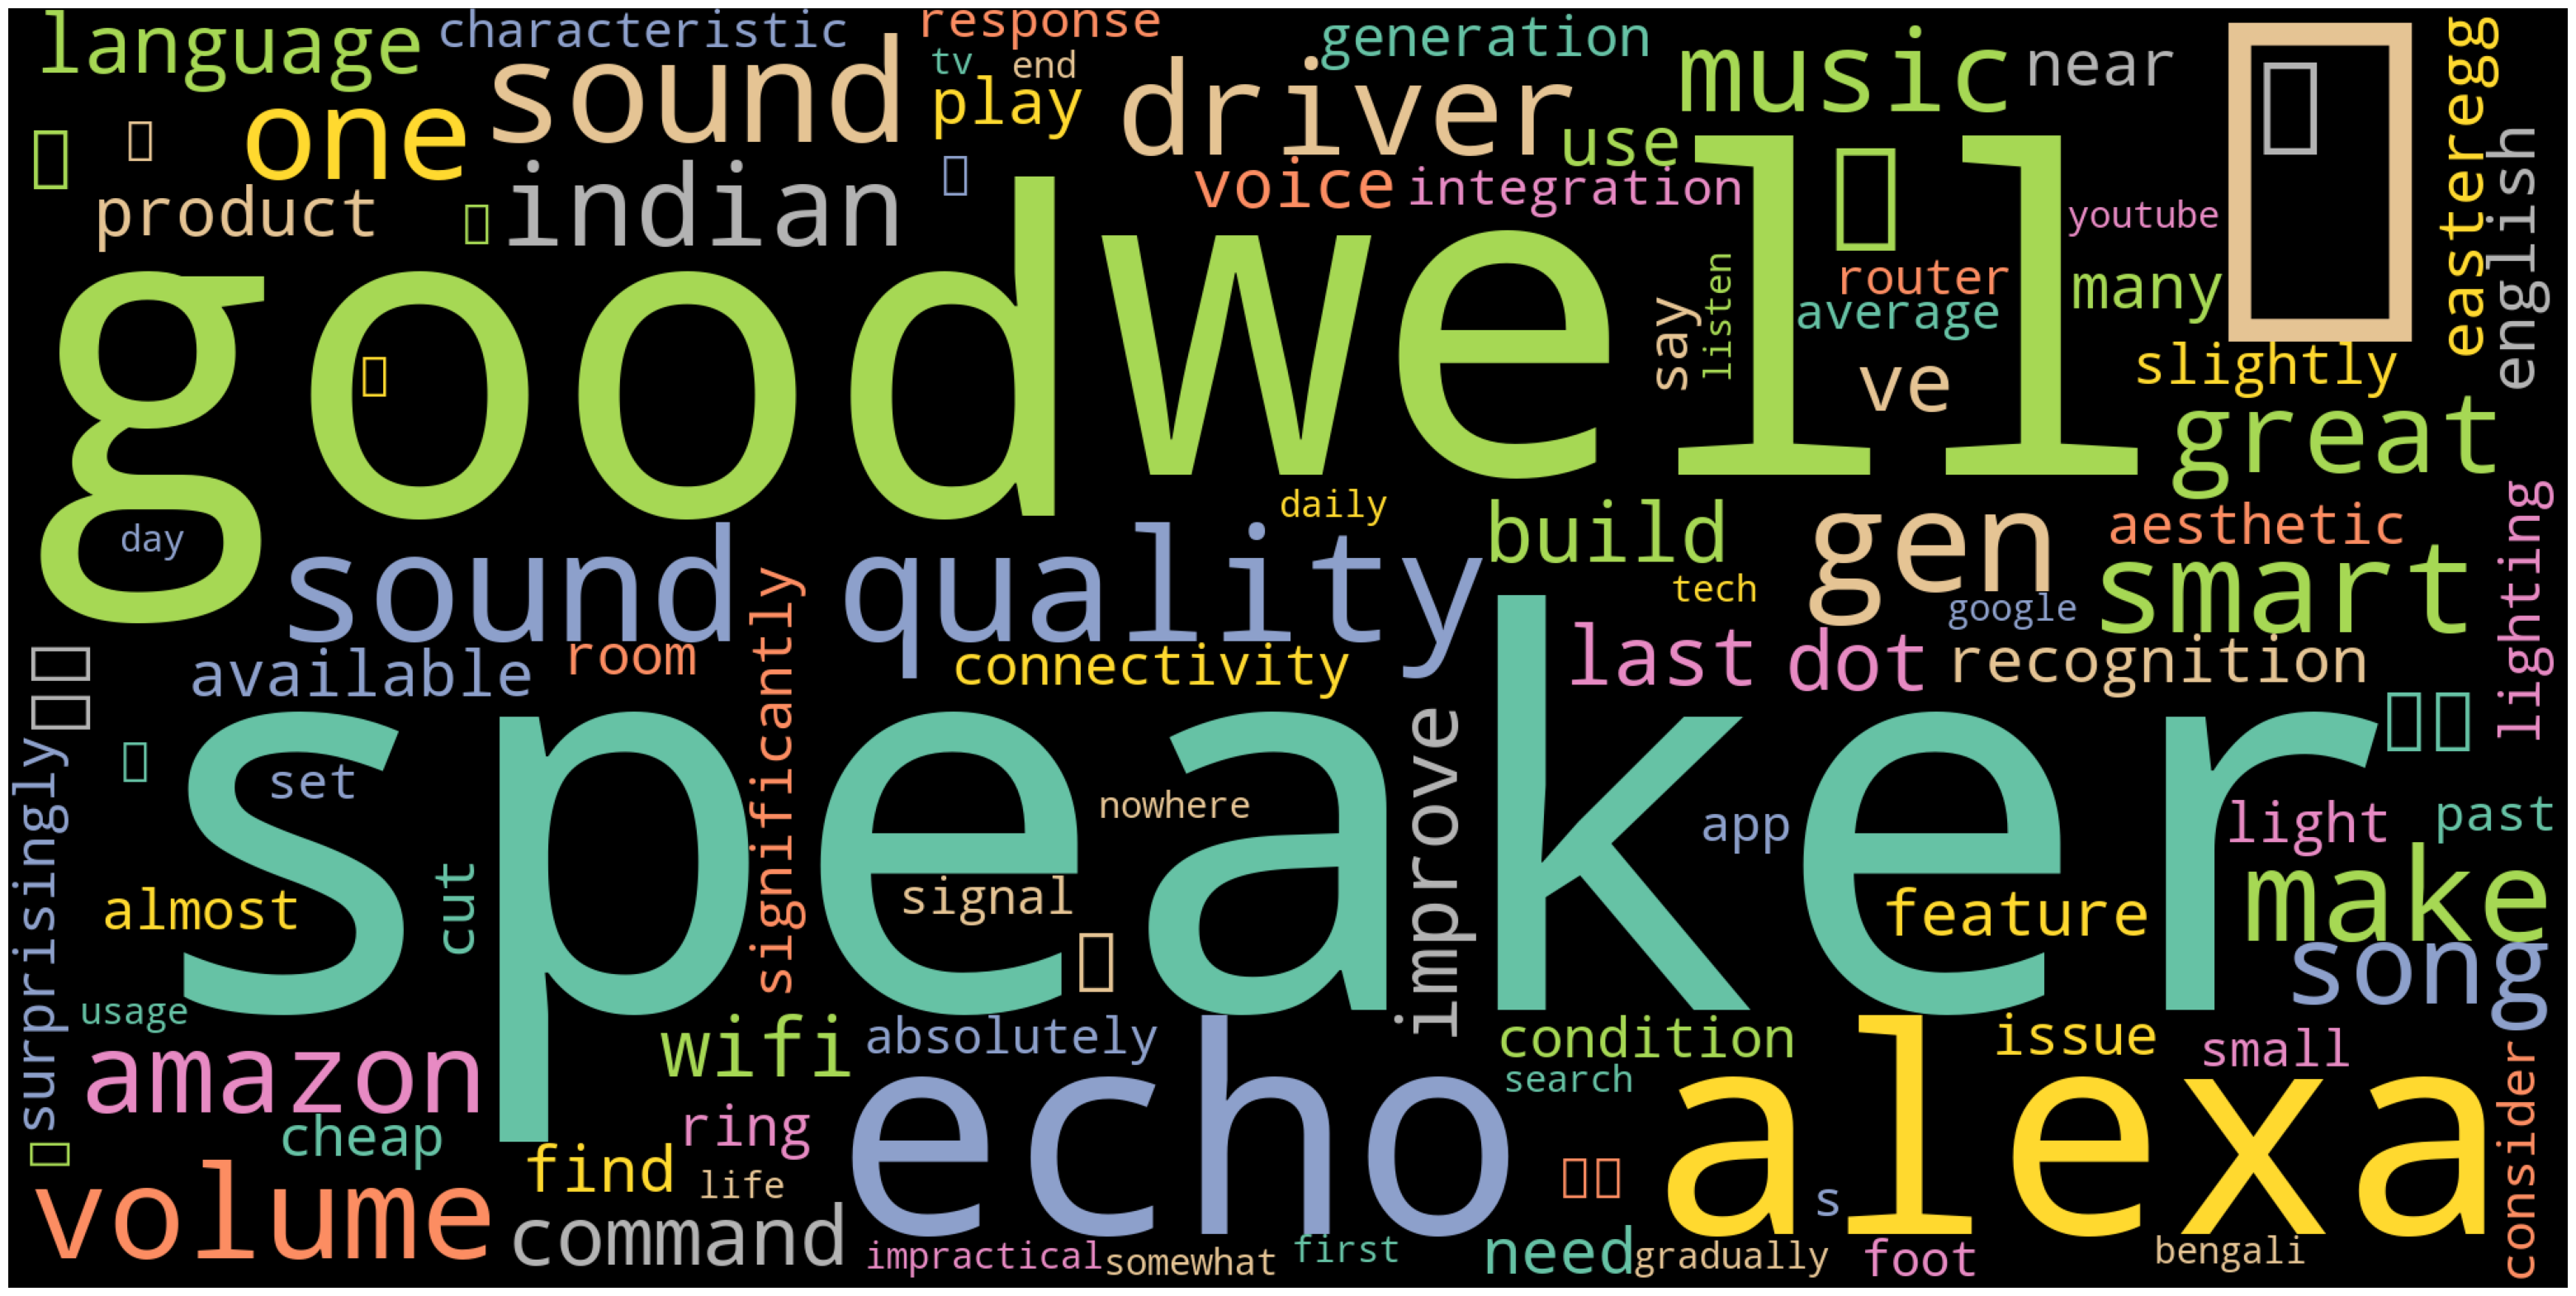

In [38]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=2000,height=1000,background_color='black',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

### Named Entity Recoginition

In [39]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [40]:
for token in doc_block[100:200]:
    print(token,token.pos_)

बिना PROPN
वाईफाई PROPN
के PROPN
कनेक्ट PROPN
नहीं PROPN
होती PROPN
है PROPN
और PROPN
मेरे PROPN
यहां VERB
पर PROPN
यह PROPN
सुविधा PROPN
नहीं PUNCT
है NUM
तो PROPN
मैं NUM
इसे PROPN
सही NOUN
से ADJ
प्रयोग PROPN
नहीं PUNCT
कर PROPN
पा X
रहा NOUN
लेकिन PROPN
अच्छा PROPN
काम PROPN
करती PROPN
है NUM
all PRON
good ADJ
sound ADJ
quality NOUN
poor ADJ
comparision NOUN
echo NOUN
dot NOUN
third ADJ
generation NOUN
not PART
information NOUN
available ADJ
like ADP
goggle PROPN
assistant NOUN
this DET
smart ADJ
speaker NOUN
one NUM
cheap ADJ
one NUM
industry NOUN
cheap ADJ
uptodate ADJ
smart ADJ
speaker NOUN
exclude VERB
3rd PROPN
gen PROPN
echodot NOUN
that PRON
say VERB
ton NOUN
functionality NOUN
like ADP
expensive ADJ
counterpart NOUN
echo NOUN
significantly ADV
cut VERB
sound ADJ
quality NOUN
I PRON
ve AUX
divide VERB
review NOUN
section NOUN
build VERB
aesthetic ADJ
this DET
speaker NOUN
build VERB
surprisingly ADV
well ADV
good ADJ
amount NOUN
weight NOUN
feel VERB
dense ADJ
reassure NOUN


In [41]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['dot', 'make', 'look', 'ring', 'light', 'adjust', 'brightness', 'accord', 'ambient', 'lighting', 'condition', 'get', 'lighting', 'condition', 'dim', 'room', 'integration', 'integration', 'corner', 'cut', 'version', 'echo', 'app', 'lot', 'music', 'stream', 'platform', 'choose', 'work', 'plug', 'hiccupsvoice', 'recognition', 'interpretation', 'bag', 'reason', 'say', 'placement', 'do', 'speaker', 'microphone', 'place', 'speaker', 'consider', 'driver', 'fire', 'problem', 'arrive', 'set', 'volume', 'struggle', 'command', 'depend', 's', 'play', 'moment', 'response', 'time', 'speaker', 'command', 'consider', 'internet', 'connection', 'speak', 'connectivity', 'quirk', 'find', 'wifi', 'reception', 'speaker', 'video', 'reveal', 'wifi', 'antenna', 'have', 'router', 'room', 'couple', 'foot', 'result', 'signal', 'loss', 'wifi', 'router', 'lie', 'foot', 'speaker', 'report', 'signal', 'strength', 'barscome', 'part', 'sound', 'speaker', 'sound', 'experience', 'come', 'fullrange', 'driver', 'driver', 

In [42]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,speaker,11
1,quality,6
2,sound,6
3,echo,5
4,make,4
5,driver,4
6,volume,4
7,song,3
8,language,3
9,dot,3


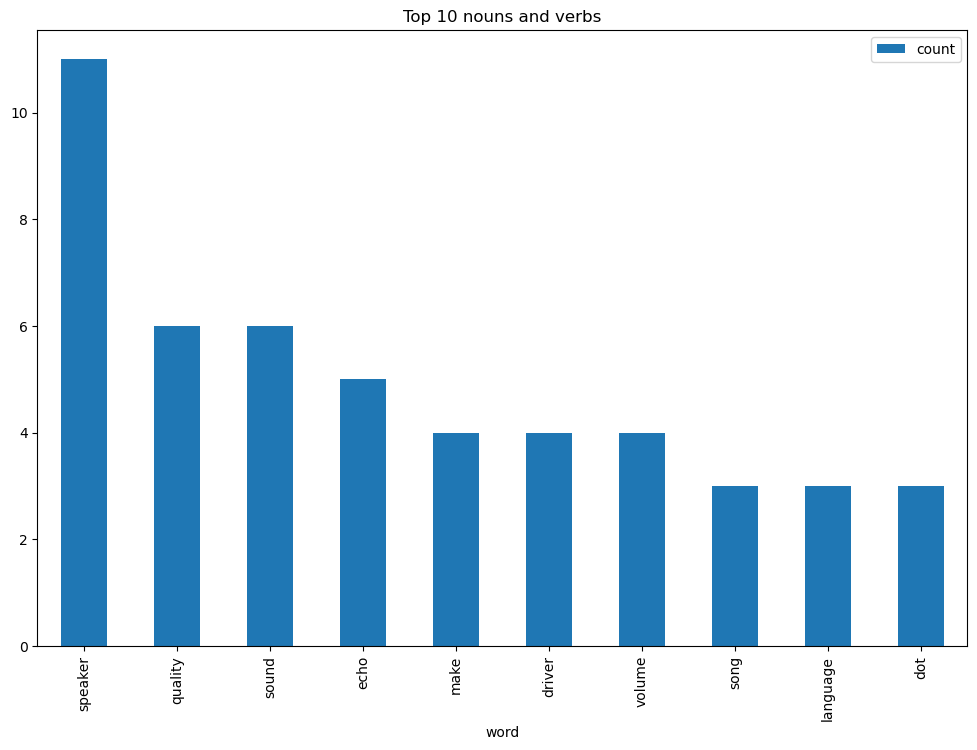

In [43]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

# C. Emotion Mining

In [44]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(review_df))
sentences

['Great product, great tech, great sound quality, but somewhat impractical in daily life usages.',
 'I ended up using it to listen to songs only for the first few days, that too it could not voice search Bengali songs from Amazon Music itself, voice recognition of other Indian languages nowhere near google.',
 'Gradually found playing songs on Youtube on TV much more convenient with bigger music library.',
 'Controlling smart home appliances from mobile, as the speaker is not accessible from all rooms.Also many features and easter-eggs advertised by Amazon is not available in India (when using Indian-English language), we need to change the language to American English or British English to access those easter-eggs and features.',
 'But in that case Alexa is unable to understand many Indian words and the Indian accent.',
 "there is some connectivity issue with laptop It's good but need battery so that it more enjoyable एलेक्सा को यूज करने के लिए अलग से वाईफाई चाहिए यह बिना वाईफाई के कन

In [45]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,"Great product, great tech, great sound quality..."
1,I ended up using it to listen to songs only fo...
2,Gradually found playing songs on Youtube on TV...
3,"Controlling smart home appliances from mobile,..."
4,But in that case Alexa is unable to understand...
5,there is some connectivity issue with laptop I...
6,That being said this has tons of functionality...
7,Ive divided the review into sections :Build an...
8,It feels dense and reassuring.
9,The base is completely made out of rubber whic...


In [46]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [47]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [48]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [49]:
# manual testing
calculate_sentiment(text='calm')

2

In [50]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0     9
1     0
2     1
3     1
4     0
5     7
6     1
7     3
8     2
9     5
10    3
11    3
12    0
13    1
14   -1
15   -2
16    0
17    0
18    1
19    2
20   -4
21   -2
22    2
23   -3
24    0
25   -3
26    2
27    0
28    2
29    0
30    3
31    0
32    4
33   -1
34    0
35    0
Name: sentiment_value, dtype: int64

In [51]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      14
1      37
2      15
3      49
4      16
5     102
6      24
7      24
8       5
9      18
10     24
11     15
12     21
13     10
14     33
15     15
16      9
17      8
18     20
19     39
20     21
21     15
22     27
23     22
24     10
25     19
26     45
27     20
28     20
29      7
30     17
31     10
32     19
33     27
34     11
35      2
Name: word_count, dtype: int64

In [52]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
20,This has been done considering the driver is f...,-4,21
25,Having your router in the same room but a coup...,-3,19
23,"Speaking of connectivity, here's a quirk i fo...",-3,22
21,It will most definitely struggle to pick-up co...,-2,15
15,No corners have been cut inspite of this being...,-2,15
33,You can connect a bluetooth speaker for improv...,-1,27
14,It gets very bright in harsh lighting conditio...,-1,33
17,Lots os music streaming platforms to choose from.,0,8
31,Sound quality deteriorates significantly when ...,0,10
29,This has a very pyramid-ish volume characteris...,0,7


In [53]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    36.000000
mean      1.000000
std       2.618615
min      -4.000000
25%       0.000000
50%       0.500000
75%       2.000000
max       9.000000
Name: sentiment_value, dtype: float64

In [54]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,"Great product, great tech, great sound quality...",9,14
2,Gradually found playing songs on Youtube on TV...,1,15
3,"Controlling smart home appliances from mobile,...",1,49
5,there is some connectivity issue with laptop I...,7,102
6,That being said this has tons of functionality...,1,24
7,Ive divided the review into sections :Build an...,3,24
8,It feels dense and reassuring.,2,5
9,The base is completely made out of rubber whic...,5,18
10,Aesthetics is subjective but this basically be...,3,24
11,The Ring Light is surprisingly well done and a...,3,15


In [55]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
1,I ended up using it to listen to songs only fo...,0,37
4,But in that case Alexa is unable to understand...,0,16
12,LED hotspots are not as obvious as on the gen ...,0,21
14,It gets very bright in harsh lighting conditio...,-1,33
15,No corners have been cut inspite of this being...,-2,15
16,The alexa app has been done decently well too.,0,9
17,Lots os music streaming platforms to choose from.,0,8
20,This has been done considering the driver is f...,-4,21
21,It will most definitely struggle to pick-up co...,-2,15
23,"Speaking of connectivity, here's a quirk i fo...",-3,22


In [56]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,"Great product, great tech, great sound quality...",9,14,0
1,I ended up using it to listen to songs only fo...,0,37,1
2,Gradually found playing songs on Youtube on TV...,1,15,2
3,"Controlling smart home appliances from mobile,...",1,49,3
4,But in that case Alexa is unable to understand...,0,16,4
5,there is some connectivity issue with laptop I...,7,102,5
6,That being said this has tons of functionality...,1,24,6
7,Ive divided the review into sections :Build an...,3,24,7
8,It feels dense and reassuring.,2,5,8
9,The base is completely made out of rubber whic...,5,18,9


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

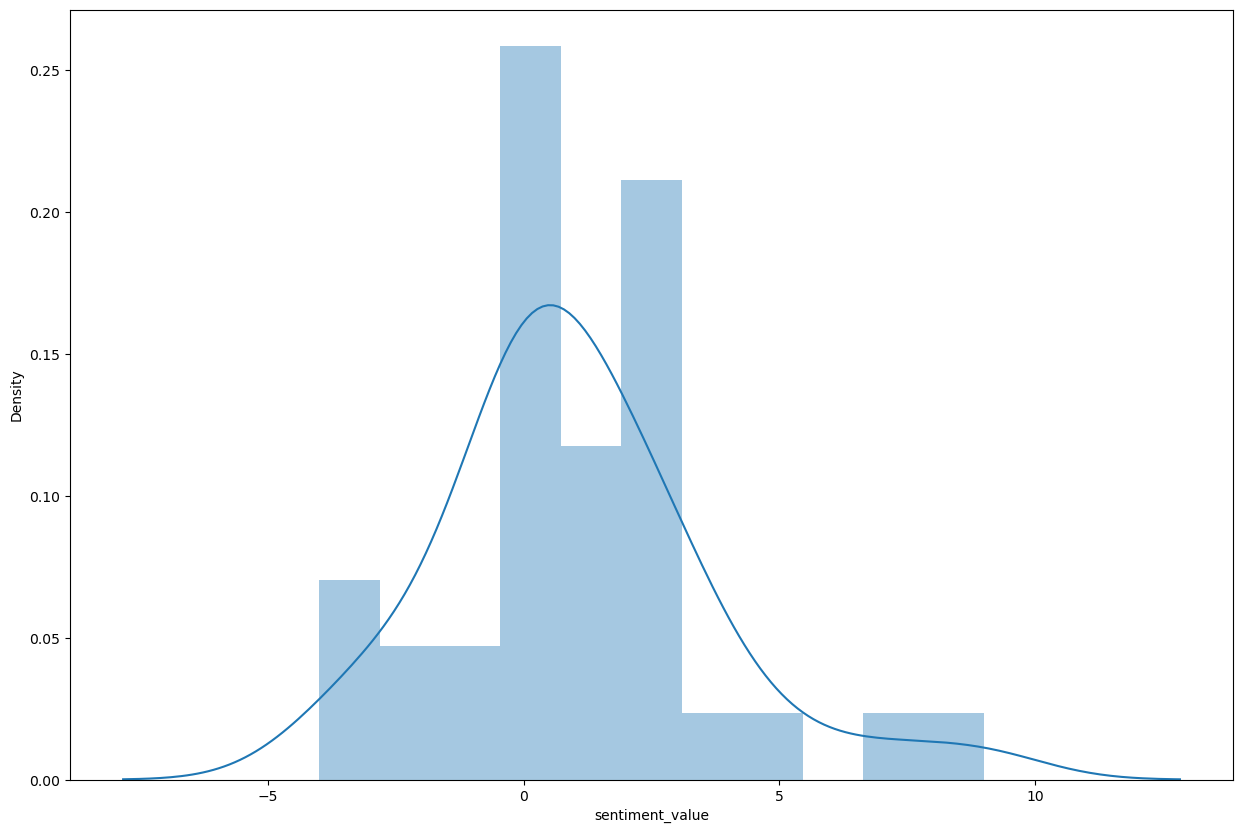

In [57]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

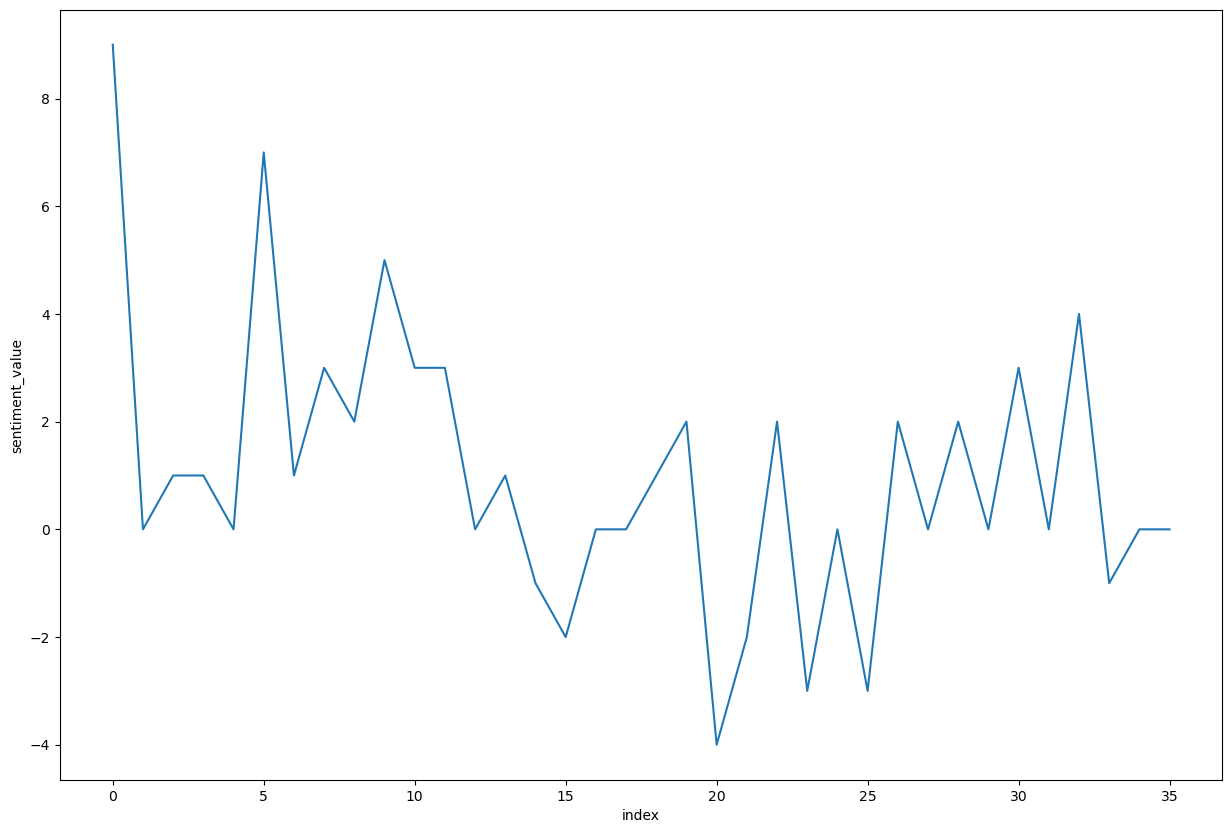

In [58]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)